# Importing libraries & methods

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import normalized_mutual_info_score as nmi

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, BatchNormalization, Activation, ActivityRegularization, LeakyReLU
from tensorflow.keras.models import Sequential, Model

In [ ]:
def Compare_Images(x, px, num_imgs=5):
  np.random.seed(100)
  test_imgs = np.random.randint(x.shape[0], size=num_imgs)
  
  for i, img_index in enumerate(test_imgs):
    ax = plt.subplot(2, num_imgs, i+1)
    if x.shape[3] != 1:
        plt.imshow(x[img_index].reshape(x.shape[1],x.shape[2],-1))
    else:
        plt.imshow(x[img_index].reshape(x.shape[1],x.shape[2]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, num_imgs, num_imgs+i+1)
    if x.shape[3] != 1:
        plt.imshow(px[img_index].reshape(x.shape[1],x.shape[2],-1))
    else:
        plt.imshow(px[img_index].reshape(x.shape[1],x.shape[2]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

# Importing Datasets

In [ ]:
# MNIST Dataset
(MNIST_x_train, MNIST_y_train), (MNIST_x_test, MNIST_y_test) = tf.keras.datasets.mnist.load_data()

MNIST_K = 10

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
MNIST_x = np.concatenate((MNIST_x_train, MNIST_x_test))
MNIST_y = np.concatenate((MNIST_y_train, MNIST_y_test))

MNIST_x = MNIST_x.reshape(-1, 28, 28, 1).astype('float32')
MNIST_x = MNIST_x/255.

print(MNIST_x.shape, MNIST_y.shape)

(70000, 28, 28, 1) (70000,)


In [ ]:
# Fashion MNIST dataset
(Fashion_x_train, Fashion_y_train), (Fashion_x_test, Fashion_y_test) = tf.keras.datasets.fashion_mnist.load_data()

Fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
Fashion_K = len(Fashion_labels)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
Fashion_x = np.concatenate((Fashion_x_train, Fashion_x_test))
Fashion_y = np.concatenate((Fashion_y_train, Fashion_y_test))

Fashion_x = Fashion_x.reshape(-1, 28, 28, 1).astype('float32')
Fashion_x = Fashion_x/255.

print(Fashion_x.shape, Fashion_y.shape)

(70000, 28, 28, 1) (70000,)


In [ ]:
# Cifar10 Dataset
(Cifar10_x_train, Cifar10_y_train), (Cifar10_x_test, Cifar10_y_test) = tf.keras.datasets.cifar10.load_data()

# Cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Cifar10_K = len(Cifar10_labels)

In [ ]:
Cifar10_x = np.concatenate((Cifar10_x_train, Cifar10_x_test), axis=0)
Cifar10_y = np.concatenate((Cifar10_y_train, Cifar10_y_test), axis=0)

Cifar10_x = Cifar10_x.reshape(-1, 32, 32, 3).astype('float32')
Cifar10_x = Cifar10_x/255.
Cifar10_y = Cifar10_y.reshape(-1, )

print(Cifar10_x.shape, Cifar10_y.shape)

(60000, 32, 32, 3) (60000,)


# Traditional Clustering Methods

In [ ]:
# Instantiating Kmeans
MNIST_kmeans = KMeans(n_clusters=10, init='k-means++')
Fashion_kmeans = KMeans(n_clusters=10, init='k-means++')
Cifar10_kmeans = KMeans(n_clusters=10, init='k-means++')

# Preprocessing Data
MNIST_x_1d = MNIST_x.reshape(MNIST_x.shape[0], -1)
Fashion_x_1d = Fashion_x.reshape(Fashion_x.shape[0], -1)
Cifar10_x_1d = Cifar10_x.reshape(Cifar10_x.shape[0], -1)

In [ ]:
# Learning & Predicting from the Data
# MNIST_kmeans_y = MNIST_kmeans.fit_predict(MNIST_x_1d)
# Fashion_kmeans_y = Fashion_kmeans.fit_predict(Fashion_x_1d)
Cifar10_kmeans_y = Cifar10_kmeans.fit_predict(Cifar10_x_1d)

In [ ]:
# Evaluations
print("ARI score of MNIST_kmeans: ",ari(MNIST_y, MNIST_kmeans_y))
print("ARI score of Fashion_kmeans: ",ari(Fashion_y, Fashion_kmeans_y))
print("ARI score of Cifar10_kmeans: ",ari(Cifar10_y, Cifar10_kmeans_y))

print("NMI of MNIST_kmeans: ",nmi(MNIST_y, MNIST_kmeans_y))
print("NMI of Fashion_kmeans: ",nmi(Fashion_y, Fashion_kmeans_y))
print("NMI of Cifar10_kmeans: ",nmi(Cifar10_y, Cifar10_kmeans_y))

ARI score of MNIST_kmeans:  0.36675295135972547
ARI score of Fashion_kmeans:  0.38486542942077084
ARI score of Cifar10_kmeans:  0.04187450972693852
NMI of MNIST_kmeans:  0.49990657785489695
NMI of Fashion_kmeans:  0.5289213837923732
NMI of Cifar10_kmeans:  0.07942691386172925


# Our Learnings

## Autoencoder Models

### Simple Autoencoder

In [ ]:
def SimpleAE (input_shape=(28, 28, 1), filters=[64, 16]):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(filters[0], activation='relu', name='encoder_1'))
  model.add(Dense(filters[1], activation='relu', name='embedding'))
  model.add(Dense(input_shape[0]*input_shape[1]*input_shape[2], activation='sigmoid', name='decoder_1'))
  model.add(Reshape(input_shape))
  # model.summary()
  return model

### Simple Autoencoder with LeakyRelu, Batch Normalization & ActivityRegularization



In [ ]:
def SimpleAE_plus (input_shape=(28, 28, 1), filters=[64, 16]):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(filters[0], name='encoder_1'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Dense(filters[1]))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(ActivityRegularization(l1=10e-6, name='embedding'))
  model.add(Dense(input_shape[0]*input_shape[1]*input_shape[2], activation='sigmoid', name='decoder_1'))
  model.add(Reshape(input_shape))
  # model.summary()
  return model

### Convolutional Autoencoder

In [ ]:
def ConvAE (input_shape=(28, 28, 1), filters=[32, 64, 16]):
  model = Sequential()
  model.add(Conv2D(filters[0], (3, 3), strides=2, padding='same', activation='relu', name='encoder_1', input_shape=input_shape))
  model.add(Conv2D(filters[1], (3, 3), strides=2, padding='same', activation='relu', name='encoder_2'))
  reshape = model.output_shape
  model.add(Flatten())
  model.add(Dense(filters[2], activation='relu', name='embedding'))
  
  model.add(Dense(filters[1]*reshape[1]*reshape[1], activation='relu'))
  model.add(Reshape((reshape[1],reshape[1], filters[1])))
  model.add(Conv2DTranspose(filters[0], (3, 3), strides=2, padding='same', activation='relu', name='decoder_2'))
  model.add(Conv2DTranspose(input_shape[2], (3, 3), strides=2, padding='same', activation='sigmoid', name='decoder_1'))
  # model.summary()
  return model

### Convolutional Autoencoder with LeakyRelu, Batch Normalization & ActivityRegularization

In [ ]:
def ConvAE_plus (input_shape=(28, 28, 1), filters=[32, 64, 16]):
  model = Sequential()
  model.add(Conv2D(filters[0], (3, 3), strides=2, padding='same', name='encoder_1', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2D(filters[1], (3, 3), strides=2, padding='same', name='encoder_2'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  reshape = model.output_shape
  
  model.add(Flatten())
  model.add(Dense(filters[2]))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(ActivityRegularization(l1=10e-6, name='embedding'))
  
  model.add(Dense(filters[1]*reshape[1]*reshape[1]))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Reshape((reshape[1],reshape[1], filters[1])))
  
  model.add(Conv2DTranspose(filters[0], (3, 3), strides=2, padding='same', name='decoder_2'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2DTranspose(input_shape[2], (3, 3), strides=2, padding='same', activation='sigmoid', name='decoder_1'))
  # model.summary()
  return model

### Deep Convolutional Autoencoder

In [ ]:
def DeepConvAE (input_shape=(28, 28, 1), filters=[32, 64, 128, 16]):
  padding = 'valid'
  if (input_shape[0])%8 == 0:
    padding = 'same'

  model = Sequential()
  model.add(Conv2D(filters[0], (5, 5), strides=2, padding='same', activation='relu', name='encoder_1', input_shape=input_shape))
  model.add(Conv2D(filters[1], (5, 5), strides=2, padding='same', activation='relu', name='encoder_2'))
  model.add(Conv2D(filters[2], (3, 3), strides=2, padding=padding, activation='relu', name='encoder_3'))
  reshape = model.output_shape
  
  model.add(Flatten())
  model.add(Dense(filters[3], activation='relu', name='embedding'))
  
  model.add(Dense(filters[2]*reshape[1]*reshape[1], activation='relu'))
  model.add(Reshape((reshape[1],reshape[1], filters[2])))
  model.add(Conv2DTranspose(filters[1], (3, 3), strides=2, padding=padding, activation='relu', name='decoder_3'))
  model.add(Conv2DTranspose(filters[0], (5, 5), strides=2, padding='same', activation='relu', name='decoder_2'))
  model.add(Conv2DTranspose(input_shape[2], (5, 5), strides=2, padding='same', activation='sigmoid', name='decoder_1'))
  # model.summary()
  return model

### Deep Convolutional Autoencoder with LeakyRelu, Batch Normalization & ActivityRegularization

In [ ]:
def DeepConvAE_plus (input_shape=(28, 28, 1), filters=[32, 64, 128, 16]):
  padding = 'valid'
  if (input_shape[0])%8 == 0:
    padding = 'same'

  model = Sequential()
  model.add(Conv2D(filters[0], (5, 5), strides=2, padding='same', name='encoder_1', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2D(filters[1], (5, 5), strides=2, padding='same', name='encoder_2'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2D(filters[2], (3, 3), strides=2, padding=padding, name='encoder_3'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  reshape = model.output_shape
  
  model.add(Flatten())
  model.add(Dense(filters[3]))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(ActivityRegularization(l1=10e-6, name='embedding'))
  
  model.add(Dense(filters[2]*reshape[1]*reshape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Reshape((reshape[1],reshape[1], filters[2])))
  
  model.add(Conv2DTranspose(filters[1], (3, 3), strides=2, padding=padding, name='decoder_3'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(filters[0], (5, 5), strides=2, padding='same', name='decoder_2'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(input_shape[2], (5, 5), strides=2, padding='same', activation='sigmoid', name='decoder_1'))
  # model.summary()
  return model

## Training our AutoEncoders for MNIST

In [ ]:
MNIST_SimpleAE = SimpleAE(input_shape=(28, 28, 1), filters=[64, 16])

In [ ]:
MNIST_SimpleAE.compile(optimizer='adam', loss='mse')
MNIST_SimpleAE_his = MNIST_SimpleAE.fit(MNIST_x, MNIST_x, batch_size=32, epochs=20)

Epoch 1/20
2188/2188 [==============================] - 8s 3ms/step - loss: 0.0359
Epoch 2/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0230
Epoch 3/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0219
Epoch 4/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0213
Epoch 5/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0209
Epoch 6/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0206
Epoch 7/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0204
Epoch 8/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0201
Epoch 9/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0199
Epoch 10/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0197
Epoch 11/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0196
Epoch 12/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0195
E

In [ ]:
MNIST_px = MNIST_SimpleAE.predict(MNIST_x[200:])

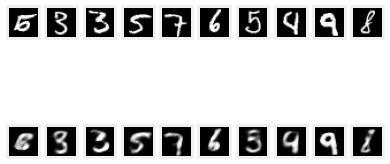

In [ ]:
Compare_Images(MNIST_x[200:], MNIST_px)

In [ ]:
MNIST_SimpleAE_plus = SimpleAE_plus(input_shape=(28, 28, 1), filters=[64, 16])
MNIST_SimpleAE_plus.compile(optimizer='adam', loss='mse')
MNIST_SimpleAE_plus_his = MNIST_SimpleAE_plus.fit(MNIST_x, MNIST_x, batch_size=32, epochs=20)

Epoch 1/20
2188/2188 [==============================] - 56s 5ms/step - loss: 0.0434
Epoch 2/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0253
Epoch 3/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0240
Epoch 4/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0235
Epoch 5/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0232
Epoch 6/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0230
Epoch 7/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0227
Epoch 8/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0225
Epoch 9/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0223
Epoch 10/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0222
Epoch 11/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0221
Epoch 12/20
2188/2188 [==============================] - 11s 5ms/step - lo

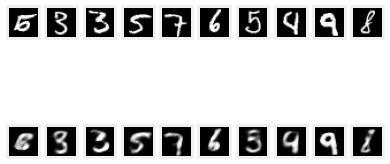

In [ ]:
MNIST_px2 = MNIST_SimpleAE.predict(MNIST_x[200:])
Compare_Images(MNIST_x[200:], MNIST_px2)

Epoch 1/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0267
Epoch 2/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0133
Epoch 3/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0118
Epoch 4/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0110
Epoch 5/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0105
Epoch 6/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0102
Epoch 7/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0099
Epoch 8/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0097
Epoch 9/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0095
Epoch 10/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0094
Epoch 11/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0093
Epoch 12/20
2188/2188 [==============================] - 15s 7ms/step - lo

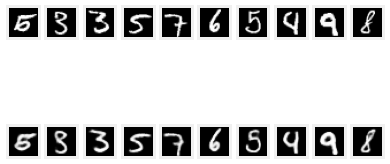

In [ ]:
MNIST_ConvAE = ConvAE(input_shape=(28, 28, 1), filters=[32, 64, 16])
MNIST_ConvAE.compile(optimizer='adam', loss='mse')
MNIST_ConvAE_his = MNIST_ConvAE.fit(MNIST_x, MNIST_x, batch_size=32, epochs=20)
MNIST_px3 = MNIST_ConvAE.predict(MNIST_x[200:])
Compare_Images(MNIST_x[200:], MNIST_px3)

Epoch 1/20
2188/2188 [==============================] - 21s 9ms/step - loss: 0.0241
Epoch 2/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0163
Epoch 3/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0152
Epoch 4/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0146
Epoch 5/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0142
Epoch 6/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0139
Epoch 7/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0136
Epoch 8/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0134
Epoch 9/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0132
Epoch 10/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0130
Epoch 11/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0129
Epoch 12/20
2188/2188 [==============================] - 20s 9ms/step - lo

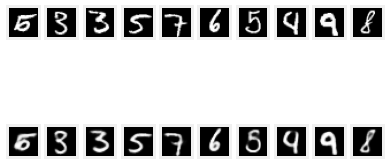

In [ ]:
MNIST_ConvAE_plus = ConvAE_plus(input_shape=(28, 28, 1), filters=[32, 64, 16])
MNIST_ConvAE_plus.compile(optimizer='adam', loss='mse')
MNIST_ConvAE_plus_his = MNIST_ConvAE_plus.fit(MNIST_x, MNIST_x, batch_size=32, epochs=20)
MNIST_px4 = MNIST_ConvAE_plus.predict(MNIST_x[200:])
Compare_Images(MNIST_x[200:], MNIST_px4)

Epoch 1/20
2188/2188 [==============================] - 22s 10ms/step - loss: 0.1129
Epoch 2/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 3/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 4/20
2188/2188 [==============================] - 22s 10ms/step - loss: 0.1123
Epoch 5/20
2188/2188 [==============================] - 22s 10ms/step - loss: 0.1123
Epoch 6/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 7/20
2188/2188 [==============================] - 22s 10ms/step - loss: 0.1123
Epoch 8/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 9/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 10/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 11/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.1123
Epoch 12/20
2188/2188 [==============================] - 21s 10

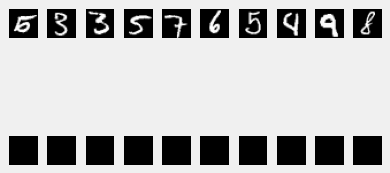

In [ ]:
MNIST_DeepConvAE = DeepConvAE(input_shape=(28, 28, 1), filters=[32, 64, 128, 16])
MNIST_DeepConvAE.compile(optimizer='adam', loss='mse')
MNIST_DeepConvAE_his = MNIST_DeepConvAE.fit(MNIST_x, MNIST_x, batch_size=32, epochs=20)
MNIST_px5 = MNIST_DeepConvAE.predict(MNIST_x[200:])
Compare_Images(MNIST_x[200:], MNIST_px5)

Epoch 1/20
2188/2188 [==============================] - 27s 12ms/step - loss: 0.0198
Epoch 2/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0146
Epoch 3/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0135
Epoch 4/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0129
Epoch 5/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0124
Epoch 6/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0121
Epoch 7/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0118
Epoch 8/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0115
Epoch 9/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0113
Epoch 10/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0111
Epoch 11/20
2188/2188 [==============================] - 28s 13ms/step - loss: 0.0109
Epoch 12/20
2188/2188 [==============================] - 28s 13

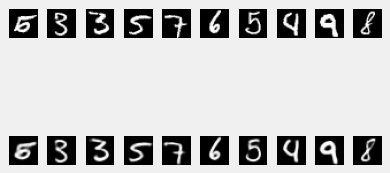

In [ ]:
MNIST_DeepConvAE_plus = DeepConvAE_plus(input_shape=(28, 28, 1), filters=[32, 64, 128, 16])
MNIST_DeepConvAE_plus.compile(optimizer='adam', loss='mse')
MNIST_DeepConvAE_plus_his = MNIST_DeepConvAE_plus.fit(MNIST_x, MNIST_x, batch_size=32, epochs=20)
MNIST_px6 = MNIST_DeepConvAE_plus.predict(MNIST_x[200:])
Compare_Images(MNIST_x[200:], MNIST_px6)

In [ ]:
MNIST_kmeans_1 = KMeans(n_clusters=10, init='k-means++') # SimpleAE
MNIST_kmeans_2 = KMeans(n_clusters=10, init='k-means++') # SimpleAE_plus
MNIST_kmeans_3 = KMeans(n_clusters=10, init='k-means++') # ConvAE
MNIST_kmeans_4 = KMeans(n_clusters=10, init='k-means++') # ConvAE_plus
MNIST_kmeans_5 = KMeans(n_clusters=10, init='k-means++') # DeepConvAE
MNIST_kmeans_6 = KMeans(n_clusters=10, init='k-means++') # DeepConvAE_plus

In [ ]:
# extract features
MNIST_SimpleAE_features = Model(inputs=MNIST_SimpleAE.input, outputs=MNIST_SimpleAE.get_layer(name='embedding').output).predict(MNIST_x)
MNIST_SimpleAE_plus_features = Model(inputs=MNIST_SimpleAE_plus.input, outputs=MNIST_SimpleAE_plus.get_layer(name='embedding').output).predict(MNIST_x)
MNIST_ConvAE_features = Model(inputs=MNIST_ConvAE.input, outputs=MNIST_ConvAE.get_layer(name='embedding').output).predict(MNIST_x)
MNIST_ConvAE_plus_features = Model(inputs=MNIST_ConvAE_plus.input, outputs=MNIST_ConvAE_plus.get_layer(name='embedding').output).predict(MNIST_x)
MNIST_DeepConvAE_features = Model(inputs=MNIST_DeepConvAE.input, outputs=MNIST_DeepConvAE.get_layer(name='embedding').output).predict(MNIST_x)
MNIST_DeepConvAE_plus_features = Model(inputs=MNIST_DeepConvAE_plus.input, outputs=MNIST_DeepConvAE_plus.get_layer(name='embedding').output).predict(MNIST_x)

In [ ]:
MNIST_SimpleAE_features = np.reshape(MNIST_SimpleAE_features, newshape=(MNIST_SimpleAE_features.shape[0], -1))
MNIST_SimpleAE_plus_features = np.reshape(MNIST_SimpleAE_plus_features, newshape=(MNIST_SimpleAE_plus_features.shape[0], -1))
MNIST_ConvAE_features = np.reshape(MNIST_ConvAE_features, newshape=(MNIST_ConvAE_features.shape[0], -1))
MNIST_ConvAE_plus_features = np.reshape(MNIST_ConvAE_plus_features, newshape=(MNIST_ConvAE_plus_features.shape[0], -1))
MNIST_DeepConvAE_features = np.reshape(MNIST_DeepConvAE_features, newshape=(MNIST_DeepConvAE_features.shape[0], -1))
MNIST_DeepConvAE_plus_features = np.reshape(MNIST_DeepConvAE_plus_features, newshape=(MNIST_DeepConvAE_plus_features.shape[0], -1))

print('MNIST_SimpleAE_features shape=', MNIST_SimpleAE_features.shape)
print('MNIST_SimpleAE_plus_features shape=', MNIST_SimpleAE_plus_features.shape)
print('MNIST_ConvAE_features shape=', MNIST_ConvAE_features.shape)
print('MNIST_ConvAE_plus_features shape=', MNIST_ConvAE_plus_features.shape)
print('MNIST_DeepConvAE_features shape=', MNIST_DeepConvAE_features.shape)
print('MNIST_DeepConvAE_plus_features shape=', MNIST_DeepConvAE_plus_features.shape)

MNIST_SimpleAE_features shape= (70000, 16)
MNIST_SimpleAE_plus_features shape= (70000, 16)
MNIST_ConvAE_features shape= (70000, 16)
MNIST_ConvAE_plus_features shape= (70000, 16)
MNIST_DeepConvAE_features shape= (70000, 16)
MNIST_DeepConvAE_plus_features shape= (70000, 16)


In [ ]:
# Learning & Predict from the Data
MNIST_SimpleAE_y = MNIST_kmeans_1.fit_predict(MNIST_SimpleAE_features)
MNIST_SimpleAE_plus_y = MNIST_kmeans_2.fit_predict(MNIST_SimpleAE_plus_features)
MNIST_ConvAE_y = MNIST_kmeans_3.fit_predict(MNIST_ConvAE_features)
MNIST_ConvAE_plus_y = MNIST_kmeans_4.fit_predict(MNIST_ConvAE_plus_features)
MNIST_DeepConvAE_y = MNIST_kmeans_5.fit_predict(MNIST_DeepConvAE_features)
MNIST_DeepConvAE_plus_y = MNIST_kmeans_6.fit_predict(MNIST_DeepConvAE_plus_features)

In [ ]:
# Evaluations
print("ARI score of MNIST_SimpleAE: ",ari(MNIST_y, MNIST_SimpleAE_y))
print("NMI score of MNIST_SimpleAE: ",nmi(MNIST_y, MNIST_SimpleAE_y))

print("ARI score of MNIST_SimpleAE_plus: ",ari(MNIST_y, MNIST_SimpleAE_plus_y))
print("NMI score of MNIST_SimpleAE_plus: ",nmi(MNIST_y, MNIST_SimpleAE_plus_y))

print("ARI score of MNIST_ConvAE: ",ari(MNIST_y, MNIST_ConvAE_y))
print("NMI score of MNIST_ConvAE: ",nmi(MNIST_y, MNIST_ConvAE_y))

print("ARI score of MNIST_ConvAE_plus: ",ari(MNIST_y, MNIST_ConvAE_plus_y))
print("NMI score of MNIST_ConvAE_plus: ",nmi(MNIST_y, MNIST_ConvAE_plus_y))

print("ARI score of MNIST_DeepConvAE: ",ari(MNIST_y, MNIST_DeepConvAE_y))
print("NMI score of MNIST_DeepConvAE: ",nmi(MNIST_y, MNIST_DeepConvAE_y))


ARI score of MNIST_SimpleAE:  0.21558007667789464
NMI score of MNIST_SimpleAE:  0.3883656394207085
ARI score of MNIST_SimpleAE_plus:  0.29123076594331315
NMI score of MNIST_SimpleAE_plus:  0.4440685399490197
ARI score of MNIST_ConvAE:  0.599721514909041
NMI score of MNIST_ConvAE:  0.6662318112317408
ARI score of MNIST_ConvAE_plus:  0.43610740536674064
NMI score of MNIST_ConvAE_plus:  0.5602328446464202
ARI score of MNIST_DeepConvAE:  0.04203155621438435
NMI score of MNIST_DeepConvAE:  0.09364888190912957


## Training our AutoEncoders for Fashion MNIST

Epoch 1/20
2188/2188 [==============================] - 8s 3ms/step - loss: 0.0294
Epoch 2/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0187
Epoch 3/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0171
Epoch 4/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0165
Epoch 5/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0161
Epoch 6/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0159
Epoch 7/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0157
Epoch 8/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0156
Epoch 9/20
2188/2188 [==============================] - 8s 3ms/step - loss: 0.0155
Epoch 10/20
2188/2188 [==============================] - 8s 3ms/step - loss: 0.0154
Epoch 11/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0153
Epoch 12/20
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0153
E

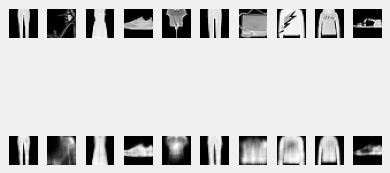

In [ ]:
Fashion_SimpleAE = SimpleAE(input_shape=(28, 28, 1), filters=[64, 16])
Fashion_SimpleAE.compile(optimizer='adam', loss='mse')
Fashion_SimpleAE_his = Fashion_SimpleAE.fit(Fashion_x, Fashion_x, batch_size=32, epochs=20)
Fashion_px = Fashion_SimpleAE.predict(Fashion_x[200:])
Compare_Images(Fashion_x[200:], Fashion_px)

Epoch 1/20
2188/2188 [==============================] - 13s 5ms/step - loss: 0.0336
Epoch 2/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0209
Epoch 3/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0199
Epoch 4/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0193
Epoch 5/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0190
Epoch 6/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0187
Epoch 7/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0185
Epoch 8/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0183
Epoch 9/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0182
Epoch 10/20
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0181
Epoch 11/20
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0180
Epoch 12/20
2188/2188 [==============================] - 11s 5ms/step - lo

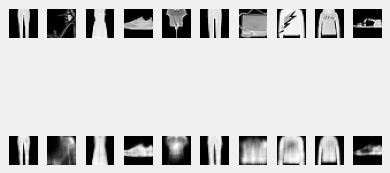

In [ ]:
Fashion_SimpleAE_plus = SimpleAE_plus(input_shape=(28, 28, 1), filters=[64, 16])
Fashion_SimpleAE_plus.compile(optimizer='adam', loss='mse')
Fashion_SimpleAE_plus_his = Fashion_SimpleAE_plus.fit(Fashion_x, Fashion_x, batch_size=32, epochs=20)
Fashion_px2 = Fashion_SimpleAE.predict(Fashion_x[200:])
Compare_Images(Fashion_x[200:], Fashion_px2)

Epoch 1/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0221
Epoch 2/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0140
Epoch 3/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0129
Epoch 4/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0123
Epoch 5/20
2188/2188 [==============================] - 15s 7ms/step - loss: 0.0119
Epoch 6/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0116
Epoch 7/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0114
Epoch 8/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0112
Epoch 9/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0111
Epoch 10/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0109
Epoch 11/20
2188/2188 [==============================] - 14s 7ms/step - loss: 0.0108
Epoch 12/20
2188/2188 [==============================] - 14s 7ms/step - lo

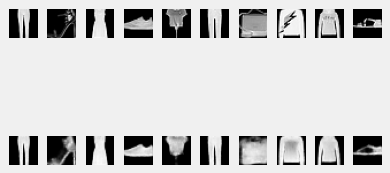

In [ ]:
Fashion_ConvAE = ConvAE(input_shape=(28, 28, 1), filters=[32, 64, 16])
Fashion_ConvAE.compile(optimizer='adam', loss='mse')
Fashion_ConvAE_his = Fashion_ConvAE.fit(Fashion_x, Fashion_x, batch_size=32, epochs=20)
Fashion_px3 = Fashion_ConvAE.predict(Fashion_x[200:])
Compare_Images(Fashion_x[200:], Fashion_px3)

Epoch 1/20
2188/2188 [==============================] - 21s 9ms/step - loss: 0.0211
Epoch 2/20
2188/2188 [==============================] - 21s 9ms/step - loss: 0.0161
Epoch 3/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0152
Epoch 4/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0146
Epoch 5/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0142
Epoch 6/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0139
Epoch 7/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0137
Epoch 8/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0135
Epoch 9/20
2188/2188 [==============================] - 19s 9ms/step - loss: 0.0133
Epoch 10/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0132
Epoch 11/20
2188/2188 [==============================] - 21s 9ms/step - loss: 0.0131
Epoch 12/20
2188/2188 [==============================] - 20s 9ms/step - lo

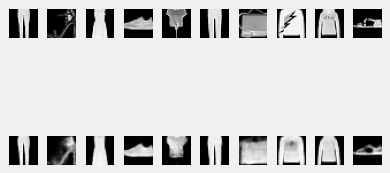

In [ ]:
Fashion_ConvAE_plus = ConvAE_plus(input_shape=(28, 28, 1), filters=[32, 64, 16])
Fashion_ConvAE_plus.compile(optimizer='adam', loss='mse')
Fashion_ConvAE_plus_his = Fashion_ConvAE_plus.fit(Fashion_x, Fashion_x, batch_size=32, epochs=20)
Fashion_px4 = Fashion_ConvAE_plus.predict(Fashion_x[200:])
Compare_Images(Fashion_x[200:], Fashion_px4)

Epoch 1/20
2188/2188 [==============================] - 22s 10ms/step - loss: 0.0218
Epoch 2/20
2188/2188 [==============================] - 21s 10ms/step - loss: 0.0138
Epoch 3/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0126
Epoch 4/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0120
Epoch 5/20
2188/2188 [==============================] - 21s 9ms/step - loss: 0.0115
Epoch 6/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0112
Epoch 7/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0109
Epoch 8/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0107
Epoch 9/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0105
Epoch 10/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0104
Epoch 11/20
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0103
Epoch 12/20
2188/2188 [==============================] - 20s 9ms/step - 

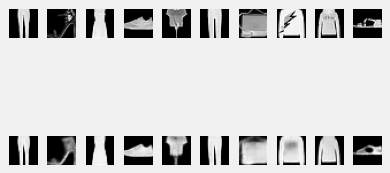

In [ ]:
Fashion_DeepConvAE = DeepConvAE(input_shape=(28, 28, 1), filters=[32, 64, 128, 16])
Fashion_DeepConvAE.compile(optimizer='adam', loss='mse')
Fashion_DeepConvAE_his = Fashion_DeepConvAE.fit(Fashion_x, Fashion_x, batch_size=32, epochs=20)
Fashion_px5 = Fashion_DeepConvAE.predict(Fashion_x[200:])
Compare_Images(Fashion_x[200:], Fashion_px5)

Epoch 1/20
2188/2188 [==============================] - 29s 12ms/step - loss: 0.0196
Epoch 2/20
2188/2188 [==============================] - 27s 12ms/step - loss: 0.0150
Epoch 3/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0139
Epoch 4/20
2188/2188 [==============================] - 27s 12ms/step - loss: 0.0133
Epoch 5/20
2188/2188 [==============================] - 27s 12ms/step - loss: 0.0129
Epoch 6/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0125
Epoch 7/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0123
Epoch 8/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0121
Epoch 9/20
2188/2188 [==============================] - 27s 12ms/step - loss: 0.0119
Epoch 10/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0118
Epoch 11/20
2188/2188 [==============================] - 26s 12ms/step - loss: 0.0117
Epoch 12/20
2188/2188 [==============================] - 26s 12

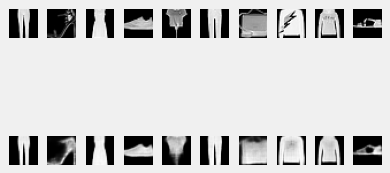

In [ ]:
Fashion_DeepConvAE_plus = DeepConvAE_plus(input_shape=(28, 28, 1), filters=[32, 64, 128, 16])
Fashion_DeepConvAE_plus.compile(optimizer='adam', loss='mse')
Fashion_DeepConvAE_plus_his = Fashion_DeepConvAE_plus.fit(Fashion_x, Fashion_x, batch_size=32, epochs=20)
Fashion_px6 = Fashion_DeepConvAE_plus.predict(Fashion_x[200:])
Compare_Images(Fashion_x[200:], Fashion_px6)

In [ ]:
Fashion_kmeans_1 = KMeans(n_clusters=10, init='k-means++') # SimpleAE
Fashion_kmeans_2 = KMeans(n_clusters=10, init='k-means++') # SimpleAE_plus
Fashion_kmeans_3 = KMeans(n_clusters=10, init='k-means++') # ConvAE
Fashion_kmeans_4 = KMeans(n_clusters=10, init='k-means++') # ConvAE_plus
Fashion_kmeans_5 = KMeans(n_clusters=10, init='k-means++') # DeepConvAE
Fashion_kmeans_6 = KMeans(n_clusters=10, init='k-means++') # DeepConvAE_plus

In [ ]:
# extract features
Fashion_SimpleAE_features = Model(inputs=Fashion_SimpleAE.input, outputs=Fashion_SimpleAE.get_layer(name='embedding').output).predict(Fashion_x)
Fashion_SimpleAE_plus_features = Model(inputs=Fashion_SimpleAE_plus.input, outputs=Fashion_SimpleAE_plus.get_layer(name='embedding').output).predict(Fashion_x)
Fashion_ConvAE_features = Model(inputs=Fashion_ConvAE.input, outputs=Fashion_ConvAE.get_layer(name='embedding').output).predict(Fashion_x)
Fashion_ConvAE_plus_features = Model(inputs=Fashion_ConvAE_plus.input, outputs=Fashion_ConvAE_plus.get_layer(name='embedding').output).predict(Fashion_x)
Fashion_DeepConvAE_features = Model(inputs=Fashion_DeepConvAE.input, outputs=Fashion_DeepConvAE.get_layer(name='embedding').output).predict(Fashion_x)
Fashion_DeepConvAE_plus_features = Model(inputs=Fashion_DeepConvAE_plus.input, outputs=Fashion_DeepConvAE_plus.get_layer(name='embedding').output).predict(Fashion_x)

In [ ]:
Fashion_SimpleAE_features = np.reshape(Fashion_SimpleAE_features, newshape=(Fashion_SimpleAE_features.shape[0], -1))
Fashion_SimpleAE_plus_features = np.reshape(Fashion_SimpleAE_plus_features, newshape=(Fashion_SimpleAE_plus_features.shape[0], -1))
Fashion_ConvAE_features = np.reshape(Fashion_ConvAE_features, newshape=(Fashion_ConvAE_features.shape[0], -1))
Fashion_ConvAE_plus_features = np.reshape(Fashion_ConvAE_plus_features, newshape=(Fashion_ConvAE_plus_features.shape[0], -1))
Fashion_DeepConvAE_features = np.reshape(Fashion_DeepConvAE_features, newshape=(Fashion_DeepConvAE_features.shape[0], -1))
Fashion_DeepConvAE_plus_features = np.reshape(Fashion_DeepConvAE_plus_features, newshape=(Fashion_DeepConvAE_plus_features.shape[0], -1))


print('Fashion_SimpleAE_features shape=', Fashion_SimpleAE_features.shape)
print('Fashion_SimpleAE_plus_features shape=', Fashion_SimpleAE_plus_features.shape)
print('Fashion_ConvAE_features shape=', Fashion_ConvAE_features.shape)
print('Fashion_ConvAE_plus_features shape=', Fashion_ConvAE_plus_features.shape)
print('Fashion_DeepConvAE_features shape=', Fashion_DeepConvAE_features.shape)
print('Fashion_DeepConvAE_plus_features shape=', Fashion_DeepConvAE_plus_features.shape)

Fashion_SimpleAE_features shape= (70000, 16)
Fashion_SimpleAE_plus_features shape= (70000, 16)
Fashion_ConvAE_features shape= (70000, 16)
Fashion_ConvAE_plus_features shape= (70000, 16)
Fashion_DeepConvAE_features shape= (70000, 16)
Fashion_DeepConvAE_plus_features shape= (70000, 16)


In [ ]:
# Learning & predict from the Data
Fashion_SimpleAE_y = Fashion_kmeans_1.fit_predict(Fashion_SimpleAE_features)
Fashion_SimpleAE_plus_y = Fashion_kmeans_2.fit_predict(Fashion_SimpleAE_plus_features)
Fashion_ConvAE_y = Fashion_kmeans_3.fit_predict(Fashion_ConvAE_features)
Fashion_ConvAE_plus_y = Fashion_kmeans_4.fit_predict(Fashion_ConvAE_plus_features)
Fashion_DeepConvAE_y = Fashion_kmeans_5.fit_predict(Fashion_DeepConvAE_features)
Fashion_DeepConvAE_plus_y = Fashion_kmeans_6.fit_predict(Fashion_DeepConvAE_plus_features)

In [ ]:
# Evaluations
print("ARI score of Fashion_SimpleAE: ",ari(Fashion_y, Fashion_SimpleAE_y))
print("NMI score of Fashion_SimpleAE: ",nmi(Fashion_y, Fashion_SimpleAE_y))

print("ARI score of Fashion_SimpleAE_plus: ",ari(Fashion_y, Fashion_SimpleAE_plus_y))
print("NMI score of Fashion_SimpleAE_plus: ",nmi(Fashion_y, Fashion_SimpleAE_plus_y))

print("ARI score of Fashion_ConvAE: ",ari(Fashion_y, Fashion_ConvAE_y))
print("NMI score of Fashion_ConvAE: ",nmi(Fashion_y, Fashion_ConvAE_y))

print("ARI score of Fashion_ConvAE_plus: ",ari(Fashion_y, Fashion_ConvAE_plus_y))
print("NMI score of Fashion_ConvAE_plus: ",nmi(Fashion_y, Fashion_ConvAE_plus_y))

print("ARI score of Fashion_DeepConvAE: ",ari(Fashion_y, Fashion_DeepConvAE_y))
print("NMI score of Fashion_DeepConvAE: ",nmi(Fashion_y, Fashion_DeepConvAE_y))

print("ARI score of Fashion_DeepConvAE_plus: ",ari(Fashion_y, Fashion_DeepConvAE_plus_y))
print("NMI score of Fashion_DeepConvAE_plus: ",nmi(Fashion_y, Fashion_DeepConvAE_plus_y))

ARI score of Fashion_SimpleAE:  0.19023789957810266
NMI score of Fashion_SimpleAE:  0.42615202376375294
ARI score of Fashion_SimpleAE_plus:  0.3609333574736686
NMI score of Fashion_SimpleAE_plus:  0.5329142854819651
ARI score of Fashion_ConvAE:  0.370121751449945
NMI score of Fashion_ConvAE:  0.5369409256637554
ARI score of Fashion_ConvAE_plus:  0.37034795350270644
NMI score of Fashion_ConvAE_plus:  0.5618748343933136
ARI score of Fashion_DeepConvAE:  0.38357854299719
NMI score of Fashion_DeepConvAE:  0.5604953436560646
ARI score of Fashion_DeepConvAE_plus:  0.44984852149700116
NMI score of Fashion_DeepConvAE_plus:  0.587629339845913


## Training our AutoEncoders for Cifar10 Dataset

In [ ]:
Cifar10_SimpleAE = SimpleAE(input_shape=(32, 32, 3), filters=[64, 16])
Cifar10_SimpleAE.compile(optimizer='adam', loss='mse')
Cifar10_SimpleAE_his = Cifar10_SimpleAE.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=20)
Cifar10_px = Cifar10_SimpleAE.predict(Cifar10_x[200:])


In [ ]:
Compare_Images(Cifar10_x[200:], Cifar10_px)

In [ ]:
Cifar10_SimpleAE_plus = SimpleAE_plus(input_shape=(32, 32, 3), filters=[64, 16])
Cifar10_SimpleAE_plus.compile(optimizer='adam', loss='mse')
Cifar10_SimpleAE_plus_his = Cifar10_SimpleAE_plus.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=20)
Cifar10_px2 = Cifar10_SimpleAE.predict(Cifar10_x[200:])
Compare_Images(Cifar10_x[200:], Cifar10_px2)

In [ ]:
Cifar10_ConvAE = ConvAE(input_shape=(32, 32, 3), filters=[32, 64, 16])
Cifar10_ConvAE.compile(optimizer='adam', loss='mse')
Cifar10_ConvAE_his = Cifar10_ConvAE.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=20)
Cifar10_px3 = Cifar10_ConvAE.predict(Cifar10_x[200:])
Compare_Images(Cifar10_x[200:], Cifar10_px3)

In [ ]:
Cifar10_ConvAE_plus = ConvAE_plus(input_shape=(32, 32, 3), filters=[32, 64, 16])
Cifar10_ConvAE_plus.compile(optimizer='adam', loss='mse')
Cifar10_ConvAE_plus_his = Cifar10_ConvAE_plus.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=20)
Cifar10_px4 = Cifar10_ConvAE_plus.predict(Cifar10_x[200:])
Compare_Images(Cifar10_x[200:], Cifar10_px4)

In [ ]:
Cifar10_DeepConvAE = DeepConvAE(input_shape=(32, 32, 3), filters=[32, 64, 128, 16])
Cifar10_DeepConvAE.compile(optimizer='adam', loss='mse')
Cifar10_DeepConvAE_his = Cifar10_DeepConvAE.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=20)
Cifar10_px5 = Cifar10_DeepConvAE.predict(Cifar10_x[200:])
Compare_Images(Cifar10_x[200:], Cifar10_px5)

In [ ]:
Cifar10_DeepConvAE_plus = DeepConvAE_plus(input_shape=(32, 32, 3), filters=[32, 64, 128, 16])
Cifar10_DeepConvAE_plus.compile(optimizer='adam', loss='mse')
Cifar10_DeepConvAE_plus_his = Cifar10_DeepConvAE_plus.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=20)
Cifar10_px6 = Cifar10_DeepConvAE_plus.predict(Cifar10_x[200:])
Compare_Images(Cifar10_x[200:], Cifar10_px6)

In [ ]:
Cifar10_kmeans_1 = KMeans(n_clusters=10, init='k-means++') # SimpleAE
Cifar10_kmeans_2 = KMeans(n_clusters=10, init='k-means++') # SimpleAE_plus
Cifar10_kmeans_3 = KMeans(n_clusters=10, init='k-means++') # ConvAE
Cifar10_kmeans_4 = KMeans(n_clusters=10, init='k-means++') # ConvAE_plus
Cifar10_kmeans_5 = KMeans(n_clusters=10, init='k-means++') # DeepConvAE
Cifar10_kmeans_6 = KMeans(n_clusters=10, init='k-means++') # DeepConvAE_plus

In [ ]:
# extract features
Cifar10_SimpleAE_features = Model(inputs=Cifar10_SimpleAE.input, outputs=Cifar10_SimpleAE.get_layer(name='embedding').output).predict(Cifar10_x)
Cifar10_SimpleAE_plus_features = Model(inputs=Cifar10_SimpleAE_plus.input, outputs=Cifar10_SimpleAE_plus.get_layer(name='embedding').output).predict(Cifar10_x)
Cifar10_ConvAE_features = Model(inputs=Cifar10_ConvAE.input, outputs=Cifar10_ConvAE.get_layer(name='embedding').output).predict(Cifar10_x)
Cifar10_ConvAE_plus_features = Model(inputs=Cifar10_ConvAE_plus.input, outputs=Cifar10_ConvAE_plus.get_layer(name='embedding').output).predict(Cifar10_x)
Cifar10_DeepConvAE_features = Model(inputs=Cifar10_DeepConvAE.input, outputs=Cifar10_DeepConvAE.get_layer(name='embedding').output).predict(Cifar10_x)
Cifar10_DeepConvAE_plus_features = Model(inputs=Cifar10_DeepConvAE_plus.input, outputs=Cifar10_DeepConvAE_plus.get_layer(name='embedding').output).predict(Cifar10_x)

In [ ]:
Cifar10_SimpleAE_features = np.reshape(Cifar10_SimpleAE_features, newshape=(Cifar10_SimpleAE_features.shape[0], -1))
Cifar10_SimpleAE_plus_features = np.reshape(Cifar10_SimpleAE_plus_features, newshape=(Cifar10_SimpleAE_plus_features.shape[0], -1))
Cifar10_ConvAE_features = np.reshape(Cifar10_ConvAE_features, newshape=(Cifar10_ConvAE_features.shape[0], -1))
Cifar10_ConvAE_plus_features = np.reshape(Cifar10_ConvAE_plus_features, newshape=(Cifar10_ConvAE_plus_features.shape[0], -1))
Cifar10_DeepConvAE_features = np.reshape(Cifar10_DeepConvAE_features, newshape=(Cifar10_DeepConvAE_features.shape[0], -1))
Cifar10_DeepConvAE_plus_features = np.reshape(Cifar10_DeepConvAE_plus_features, newshape=(Cifar10_DeepConvAE_plus_features.shape[0], -1))


print('Cifar10_SimpleAE_features shape=', Cifar10_SimpleAE_features.shape)
print('Cifar10_SimpleAE_plus_features shape=', Cifar10_SimpleAE_plus_features.shape)
print('Cifar10_ConvAE_features shape=', Cifar10_ConvAE_features.shape)
print('Cifar10_ConvAE_plus_features shape=', Cifar10_ConvAE_plus_features.shape)
print('Cifar10_DeepConvAE_features shape=', Cifar10_DeepConvAE_features.shape)
print('Cifar10_DeepConvAE_plus_features shape=', Cifar10_DeepConvAE_plus_features.shape)

In [ ]:
# Learning & predict from the Data
Cifar10_SimpleAE_y = Cifar10_kmeans_1.fit_predict(Cifar10_SimpleAE_features)
Cifar10_SimpleAE_plus_y = Cifar10_kmeans_2.fit_predict(Cifar10_SimpleAE_plus_features)
Cifar10_ConvAE_y = Cifar10_kmeans_3.fit_predict(Cifar10_ConvAE_features)
Cifar10_ConvAE_plus_y = Cifar10_kmeans_4.fit_predict(Cifar10_ConvAE_plus_features)
Cifar10_DeepConvAE_y = Cifar10_kmeans_5.fit_predict(Cifar10_DeepConvAE_features)
Cifar10_DeepConvAE_plus_y = Cifar10_kmeans_6.fit_predict(Cifar10_DeepConvAE_plus_features)

In [ ]:
# Evaluations
print("ARI score of Cifar10_SimpleAE: ",ari(Cifar10_y, Cifar10_SimpleAE_y))
print("NMI score of Cifar10_SimpleAE: ",nmi(Cifar10_y, Cifar10_SimpleAE_y))

print("ARI score of Cifar10_SimpleAE_plus: ",ari(Cifar10_y, Cifar10_SimpleAE_plus_y))
print("NMI score of Cifar10_SimpleAE_plus: ",nmi(Cifar10_y, Cifar10_SimpleAE_plus_y))

print("ARI score of Cifar10_ConvAE: ",ari(Cifar10_y, Cifar10_ConvAE_y))
print("NMI score of Cifar10_ConvAE: ",nmi(Cifar10_y, Cifar10_ConvAE_y))

print("ARI score of Cifar10_ConvAE_plus: ",ari(Cifar10_y, Cifar10_ConvAE_plus_y))
print("NMI score of Cifar10_ConvAE_plus: ",nmi(Cifar10_y, Cifar10_ConvAE_plus_y))

print("ARI score of Cifar10_DeepConvAE: ",ari(Cifar10_y, Cifar10_DeepConvAE_y))
print("NMI score of Cifar10_DeepConvAE: ",nmi(Cifar10_y, Cifar10_DeepConvAE_y))

print("ARI score of Cifar10_DeepConvAE_plus: ",ari(Cifar10_y, Cifar10_DeepConvAE_plus_y))
print("NMI score of Cifar10_DeepConvAE_plus: ",nmi(Cifar10_y, Cifar10_DeepConvAE_plus_y))

# Deep Clustering

In [ ]:
epochs = 12
learning_rate = 0.00002

In [ ]:
def DeepConvAE_plus2 (input_shape=(28, 28, 1), filters=[32, 64, 128, 30]):
  padding = 'valid'
  if (input_shape[0])%8 == 0:
    padding = 'same'

  model = Sequential()
  model.add(Conv2D(filters[0], (5, 5), strides=1, padding='same', name='encoder_1', input_shape=input_shape))
  # model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2D(filters[1], (3, 3), strides=2, padding='same', name='encoder_2'))
  # model.add(BatchNormalization())
  model.add(LeakyReLU())
  
  model.add(Conv2D(filters[2], (3, 3), strides=2, padding=padding, name='encoder_3'))
  # model.add(BatchNormalization())
  model.add(LeakyReLU())
  reshape = model.output_shape
  
  model.add(Flatten())
  model.add(Dense(filters[3]))
  # model.add(BatchNormalization())
  # model.add(LeakyReLU())
  # model.add(ActivityRegularization(l1=10e-6, name='embedding'))
  
  model.add(Dense(filters[2]*reshape[1]*reshape[1], activation='relu'))
  # model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(Reshape((reshape[1],reshape[1], filters[2])))
  
  model.add(Conv2DTranspose(filters[1], (3, 3), strides=2, padding=padding, name='decoder_3'))
  # model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(filters[0], (3, 3), strides=2, padding='same', name='decoder_2'))
  # model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(input_shape[2], (5, 5), strides=1, padding='same', name='decoder_1'))
  # model.summary()
  return model

In [ ]:
Cifar10_Deep = DeepConvAE_plus2(input_shape=(32, 32, 3), filters=[64, 128, 128, 200])
Cifar10_Deep.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                                loss='mse')
Cifar10_Deep.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 encoder_2 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 encoder_3 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)             

In [ ]:
Cifar10_Deep_history = Cifar10_Deep.fit(Cifar10_x, Cifar10_x, batch_size=32, epochs=epochs)

Epoch 1/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0348
Epoch 2/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0127
Epoch 3/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0091
Epoch 4/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0078
Epoch 5/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0069
Epoch 6/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0063
Epoch 7/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0056
Epoch 8/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0052
Epoch 9/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0049
Epoch 10/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0047
Epoch 11/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0045
Epoch 12/12
1875/1875 [==============================] - 41s 22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Cifar10_Deep.save('drive/MyDrive/work/Cifar10_Deep')

INFO:tensorflow:Assets written to: drive/MyDrive/work/Cifar10_Deep/assets


In [ ]:
Cifar10_Deep = tf.keras.models.load_model('drive/MyDrive/work//Cifar10_Deep')

In [ ]:
Cifar10_deep_predict = Cifar10_Deep.predict(Cifar10_x)

In [ ]:
np.save('drive/MyDrive/work/Cifar10_deep_predict.npy', Cifar10_deep_predict)

In [ ]:
Cifar10_deep_predict = np.load('drive/MyDrive/work/Cifar10_deep_predict.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


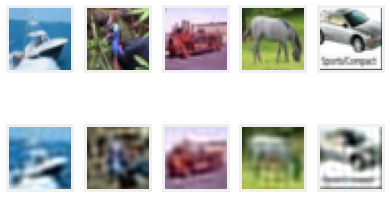

In [ ]:
Compare_Images(Cifar10_x[0:100], Cifar10_deep_predict[0:100], num_imgs=5)

In [ ]:
Cifar10_kmeans = KMeans(n_clusters=10, init='k-means++')
Cifar10_sc = SpectralClustering(n_clusters = 10, affinity ='rbf')

In [ ]:
# extract features
Cifar10_features = Model(inputs=Cifar10_Deep.input, outputs=Cifar10_Deep.get_layer(name='dense_8').output).predict(Cifar10_x[0:7000])

In [ ]:
Cifar10_features = np.reshape(Cifar10_features, newshape=(Cifar10_features.shape[0], -1))
print('Cifar10_features shape=', Cifar10_features.shape)

Cifar10_features shape= (7000, 200)


In [ ]:
# Learning & predict from the Data
Cifar10_pred_y_kmeans = Cifar10_kmeans.fit_predict(Cifar10_features)
# Cifar10_pred_y_sc = Cifar10_sc.fit_predict(Cifar10_features)

In [ ]:
# Evaluations
print("ARI score of Autoencoder & Cifar10_kmeans: ",ari(Cifar10_y[0:7000], Cifar10_pred_y_kmeans[0:7000]))
print("NMI score of Autoencoder & Cifar10_kmeans: ",nmi(Cifar10_y[0:7000], Cifar10_pred_y_sc[0:7000]))

ARI score of Autoencoder & Cifar10_kmeans:  0.04981944488873563
NMI score of Autoencoder & Cifar10_kmeans:  0.1179284851525351


Bibliography

*   [Neural Networks and Clustering 2 ( Autoencoders + kmeans )](https://www.youtube.com/watch?v=ci0xtJwZdzk)
*   [Neural Networks and Clustering (Autoencoders)](https://www.youtube.com/watch?v=0oEMORg04zw)
*   [Deep Clustering with Convolutional Autoencoders](https://www.youtube.com/watch?v=fxUaJSfZMxk)